In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from minisom import MiniSom

In [2]:
df = pd.read_csv(r'E:\P16-Self-Organizing-Maps\Credit_Card_Applications.csv')

In [3]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = mm.fit_transform(X)

In [6]:
X.shape

(690, 15)

In [7]:
y.shape

(690,)

In [8]:
#SOM initialization
som = MiniSom(x=10,y=10,input_len=15, sigma=1, learning_rate=0.5)

In [9]:
#weight initialization
som.random_weights_init(X)
#training SOM
som.train_random(data=X, num_iteration=100)

In [10]:
#visualizing the results
#mit is the mean of distance of all the neurons from the winning node
from pylab import bone, pcolor, colorbar, plot, show

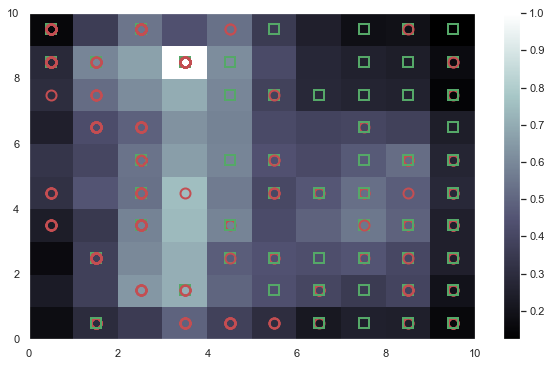

In [11]:
plt.figure(figsize=(10,6))
bone()
pcolor(som.distance_map().T) #return distances of all the winning node
colorbar() #will give legend of all colors
markers = ['o','s']
colors = ['r','g'] #red no approval, green got approval
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)

In [12]:
#Finding the frauds
mappings = som.win_map(X)

In [15]:
frauds = mappings[(3,8)]

In [16]:
frauds

[array([0.38898166, 0.        , 0.23804511, 0.0625    , 0.        ,
        0.23076923, 0.375     , 0.04385965, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.14      , 0.        ]),
 array([1.77504415e-01, 0.00000000e+00, 1.00300752e-01, 3.75000000e-01,
        0.00000000e+00, 1.00000000e+00, 8.75000000e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e-01, 7.70000000e-02, 3.20000000e-04]),
 array([0.00980263, 0.        , 0.08646617, 0.00589286, 0.5       ,
        0.76923077, 0.375     , 0.00140351, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.19      , 0.        ]),
 array([0.71942386, 0.        , 0.29067669, 0.05803571, 0.5       ,
        0.07692308, 0.375     , 0.01894737, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.        , 0.        ]),
 array([2.93394039e-01, 0.00000000e+00, 6.47819549e-01, 1.51785714e-01,
        0.00000000e+00, 0.00000000e+

In [17]:
frauds = mm.inverse_transform(frauds)

In [21]:
len(frauds)

28